In [2]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure 

import numpy as np
import pandas as pd

In [3]:
ff1.Cache.enable_cache("cache")

In [4]:
quali = ff1.get_session(2022, "Saudi Arabia", "Q")
quali.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.0.7]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver  1: Encountered 1 timing integrity error(s) near lap(s): [12].
This might be a bug and should be reported.
req            INFO 	Data has been written to cache!
req            I

In [5]:
driver_1, driver_2 = "PER", "LEC"

In [8]:
driver_1_laps = quali.laps.pick_driver(driver_1)
driver_1_fastest_lap = driver_1_laps.pick_fastest()
driver_1_telemetry = driver_1_fastest_lap.get_telemetry().add_distance()

In [9]:
driver_2_telemetry = quali.laps.pick_driver(driver_2).pick_fastest().get_telemetry().add_distance()

In [12]:
team_driver_1 = driver_1_fastest_lap["Team"]
team_driver_2 = quali.laps.pick_driver(driver_2).pick_fastest()["Team"]

In [13]:
print(team_driver_1)
print(team_driver_2)

Red Bull Racing
Ferrari


In [14]:
delta_time, ref_tel, compare_tel = utils.delta_time(driver_1_fastest_lap, quali.laps.pick_driver(driver_2).pick_fastest())

C:\Users\megan\anaconda3\lib\site-packages\fastf1\utils.py:81: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


In [15]:
plot_size = [15, 15]
plot_title = f"{quali.event.year} {quali.event.EventName} - {quali.name} - {driver_1} VS {driver_2}"
plot_ratios = [1, 3, 2, 1, 1, 2, 1]
plot_filename = plot_title.replace(" ", "") + ".png"

In [16]:
quali.event

RoundNumber                                                    2
Country                                             Saudi Arabia
Location                                                  Jeddah
OfficialEventName    FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022
EventDate                                    2022-03-27 00:00:00
EventName                               Saudi Arabian Grand Prix
EventFormat                                         conventional
Session1                                              Practice 1
Session1Date                           2022-03-25 17:00:00+03:00
Session1DateUtc                              2022-03-25 14:00:00
Session2                                              Practice 2
Session2Date                           2022-03-25 20:00:00+03:00
Session2DateUtc                              2022-03-25 17:00:00
Session3                                              Practice 3
Session3Date                           2022-03-26 17:00:00+03:00
Session3DateUtc          

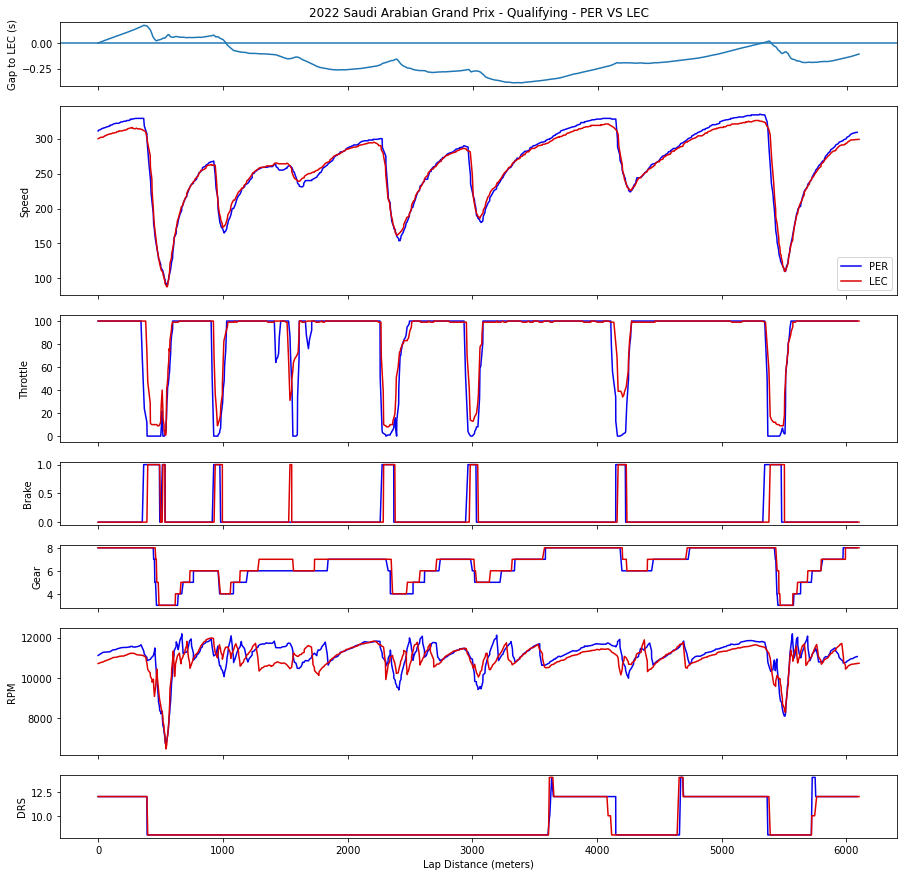

In [20]:
plt.rcParams['figure.figsize'] = plot_size

fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})

ax[0].title.set_text(plot_title)

# delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f'Gap to {driver_2} (s)')

# speed trace
ax[1].plot(driver_1_telemetry["Distance"], driver_1_telemetry["Speed"], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[1].plot(driver_2_telemetry["Distance"], driver_2_telemetry["Speed"], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[1].set(ylabel="Speed")
ax[1].legend(loc = "lower right")

# throttle trace
ax[2].plot(driver_1_telemetry["Distance"], driver_1_telemetry["Throttle"], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[2].plot(driver_2_telemetry["Distance"], driver_2_telemetry["Throttle"], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[2].set(ylabel="Throttle")

# brake trace 
ax[3].plot(driver_1_telemetry["Distance"], driver_1_telemetry["Brake"], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].plot(driver_2_telemetry["Distance"], driver_2_telemetry["Brake"], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[3].set(ylabel="Brake")

# gear trace
ax[4].plot(driver_1_telemetry["Distance"], driver_1_telemetry["nGear"], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].plot(driver_2_telemetry["Distance"], driver_2_telemetry["nGear"], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[4].set(ylabel="Gear")

# RPM trace
ax[5].plot(driver_1_telemetry["Distance"], driver_1_telemetry["RPM"], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].plot(driver_2_telemetry["Distance"], driver_2_telemetry["RPM"], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[5].set(ylabel="RPM")

# DRS trace
ax[6].plot(driver_1_telemetry["Distance"], driver_1_telemetry["DRS"], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[6].plot(driver_2_telemetry["Distance"], driver_2_telemetry["DRS"], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[6].set(ylabel="DRS")
ax[6].set(xlabel="Lap Distance (meters)")

# hiding ticks
for a in ax.flat:
    a.label_outer()

plt.show()